**DB scan CLUSTERING** :
 now we want to measure DB scan approach ...

 

*First we import prerequisites like needed libraries and dataset.*

In [ ]:
import sys

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
# convert each image to 1 dimensional array

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 28, 28)
(60000,)
(60000, 784)
(784,)


Now we want to implement db scan using sklearn dbscan clustering . but first we need a value for epsilon so lets take a look at our data.

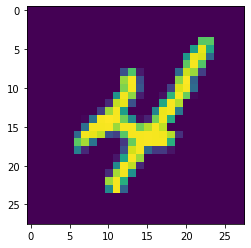

In [ ]:
plt.imshow(x_train[9])
plt.show()

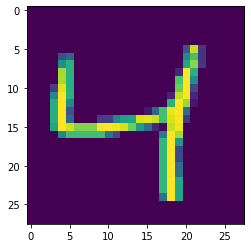

In [ ]:
plt.imshow(x_train[2])
plt.show()

*As you can see both X[2] and X[9] are representing 4 digit but their ndarrays are different. So I decided to calcute the distance between these two arrays in order to estimate the epsilon value.*

In [ ]:
import numpy
dist = numpy.linalg.norm(X[2]-X[9])
dist

8.513998243479111

this number is not a good estimation for epsilon value for couple of reasons such as : 1- dataset have some outliers. 2- we choose only two point.
so lets begin are clustering with the defualt value of epsilon and inner points and if we will adjust these two parameters with considering the number of clusters which it gives to us.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Compute DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

KeyboardInterrupt: ignored

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X[:5000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 5000


It seems like our epsilon parameter is too low for this dataset(as mentioned above two random digit with same label(4) had 8.5 distance ) so I increase epsilon parameter to catch more points.

In [ ]:
db = DBSCAN(eps=4, min_samples=5).fit(X[:5000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 4259


As you can see the result is significantly better . lets run one more time with increasing min_sample parameter to 10.

In [ ]:
db = DBSCAN(eps=4, min_samples=10).fit(X[:5000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 4421


*still we have so much noise detected.*

In [ ]:
db = DBSCAN(eps=8, min_samples=50).fit(X[:5000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 81


Now we reduced the noise amount by increasing the min_samples but the clusters fall into one which is not acceptable . So lets reduce epsilon.

In [ ]:
db = DBSCAN(eps=6.5, min_samples=5).fit(X[:5000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 614


In [ ]:
db = DBSCAN(eps=6.5, min_samples=2).fit(X[:5000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 41
Estimated number of noise points: 425


In [ ]:
db = DBSCAN(eps=6.5, min_samples=3).fit(X[:7000,])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 15
Estimated number of noise points: 529


As it is calculated, we have 15 cluster in 7k data and 500 noise data which they are not belong to any of those 15 clusters . we only run the db scan on 7k of our data due to lack of memmory.
Lets begin with labeling the clusters with actual infered labels and then compute the accuracy of our clustering.

In [ ]:
# purity measure function
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# rand index measurement function
from sklearn.metrics.cluster import adjusted_rand_score
def rand_index_score(y_true,y_pred):
  return adjusted_rand_score(y_true,y_pred)

In [ ]:
print(" rand index score of dbscan algorithm with eps=6.5, min_samples=3 parameter is :" +str(rand_index_score(Y[:7000,],labels)) )
print("purity  of db scan algorithm with eps=6.5, min_samples=3 parameter  is :" +str(purity_score(Y[:7000,],labels)) )

 rand index score of dbscan algorithm with eps=6.5, min_samples=3 parameter is :0.0030491845783167707
purity  of db scan algorithm with eps=6.5, min_samples=3 parameter  is :0.13485714285714287
